<a href="https://colab.research.google.com/github/jatinlakhani1234/ML/blob/master/nlp_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project
Mounting from drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing and Downloading required libraries

In [3]:
!pip install wordcloud

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Reading required files

In [6]:
with open(r'/content/drive/My Drive/Project_01/Stories Pictures Tell Book 6 by Flora L. Carpenter.txt', 'r',  encoding="utf8") as handle:
  T1 = handle.read().lower()
    
with open(r'/content/drive/My Drive/Project_01/63417-0.txt', 'r',  encoding="utf8") as handle:
  T2 = handle.read().lower()

## Pre-Processing

In [7]:
def pre_processing(text):
  text_new = text.replace('\n',' ')
  text_new = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", ',', "'", "\"", '#', '-', '[', ']', '*', '_', '=','“', '”', '’', '●', '(', ')'))
  text_new = " ".join(text_new.split()) # multiple spaces
  return text_new

In [8]:
T1_new = pre_processing(T1)
T2_new = pre_processing(T2)

In [9]:
print(T1_new, end='\n')
print()
print(T2_new)

﻿project gutenbergs stories pictures tell book 6 by flora carpenter this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or reuse it under the terms of the project gutenberg license included with this ebook or online at wwwgutenbergorg if you are not located in the united states youll have to check the laws of the country where you are located before using this ebook title stories pictures tell book 6 author flora carpenter release date september 14 2020 ebook 63199 language english character set encoding utf8 start of this project gutenberg ebook stories pictures tell book 6 produced by david garcia barry abrahamsen and the online distributed proofreading team at https//wwwpgdpnet stories pictures tell illustration decoration stories pictures tell book six by flora l carpenter instructor in drawing at waite high school toledo ohio formerly supervisor of dra

In [10]:
def TextAfterRemovingUnnecessary_T1(text):
    pattern = r"project.*illustration\ssir\sgalahad | transcribers\snotes.*ebooks"
    punc = re.compile(pattern)
    a = punc.sub("", text)
    return(a)

In [11]:
def TextAfterRemovingUnnecessary_T2(text):
    pattern = r"the\sproject.*chapter\sone\stommy\sand\sthe\swishingstone|chapter|one|two|three|four|transcribers\snote.*"

    punc = re.compile(pattern)
    a = punc.sub("", text)
    return(a)

In [12]:
T1_updated = TextAfterRemovingUnnecessary_T1(T1_new)
T2_updated = TextAfterRemovingUnnecessary_T2(T2_new)
print(T1_updated)
print()
print()
print(T2_updated)

﻿questions to arouse interest who is this man how is he dressed what do his armor and title sir tell us he is how many have read tennysons poems telling the story of the knights of the round table what does sir galahad look as if he were about to do why do you think he is starting on a journey rather than returning from one why do you think it must be an important journey how will he go what was expected of a knight in those days tell of some of their good deeds what would you judge the character of this knight to be where is he represented in this picture is he walking or standing still looking at something in particular or lost in thought does he appear angry meek determined hesitating thoughtful or dreamy what do his clasped hands indicate what color is the horse upon what part of the man and horse does the light fall what would you consider the main thought expressed in this picture original picture collection alexander henderson mp london england artist george frederick watts wŏts

In [13]:
tokens_T1 = word_tokenize(T1_updated)
tokens_T2 = word_tokenize(T2_updated)
print(tokens_T1)
print(tokens_T2)

['\ufeffquestions', 'to', 'arouse', 'interest', 'who', 'is', 'this', 'man', 'how', 'is', 'he', 'dressed', 'what', 'do', 'his', 'armor', 'and', 'title', 'sir', 'tell', 'us', 'he', 'is', 'how', 'many', 'have', 'read', 'tennysons', 'poems', 'telling', 'the', 'story', 'of', 'the', 'knights', 'of', 'the', 'round', 'table', 'what', 'does', 'sir', 'galahad', 'look', 'as', 'if', 'he', 'were', 'about', 'to', 'do', 'why', 'do', 'you', 'think', 'he', 'is', 'starting', 'on', 'a', 'journey', 'rather', 'than', 'returning', 'from', 'one', 'why', 'do', 'you', 'think', 'it', 'must', 'be', 'an', 'important', 'journey', 'how', 'will', 'he', 'go', 'what', 'was', 'expected', 'of', 'a', 'knight', 'in', 'those', 'days', 'tell', 'of', 'some', 'of', 'their', 'good', 'deeds', 'what', 'would', 'you', 'judge', 'the', 'character', 'of', 'this', 'knight', 'to', 'be', 'where', 'is', 'he', 'represented', 'in', 'this', 'picture', 'is', 'he', 'walking', 'or', 'standing', 'still', 'looking', 'at', 'something', 'in', 'pa

## Frequency distribution of tokens
Showing only for top 10 tokens


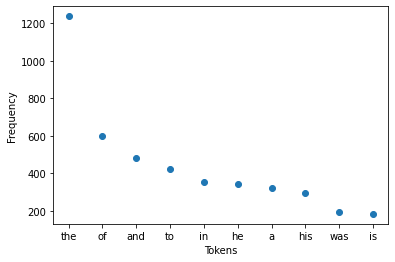

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

from nltk import FreqDist
fdist1 = FreqDist(tokens_T1)
list1 = fdist1.most_common() # Sorting based on frequency. List of tuple (word, freq)
xs = [] # Contains the words.
ys = [] # Contains the frequency of corresponding word.
for x, y in list1:
    xs.append(x)
    ys.append(y)
plt.scatter(xs[:10],ys[:10])
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()
# print(list1)

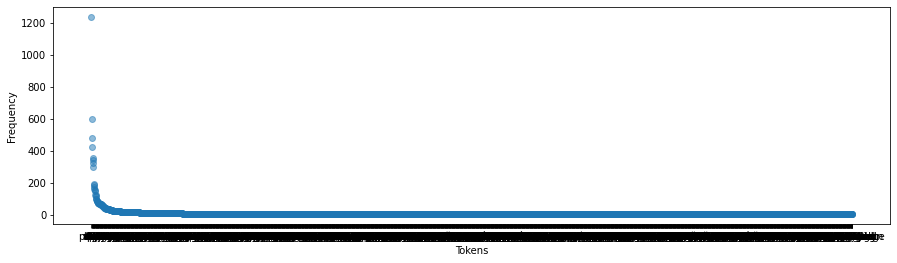

In [50]:
plt.figure(figsize=(15,4))
plt.scatter(xs,ys, alpha = 0.5)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()

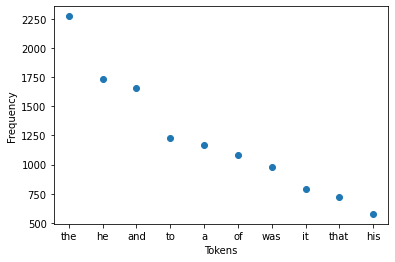

In [49]:
fdist2 = FreqDist(tokens_T2)
list2 = fdist2.most_common() # Sorting based on frequency. List of tuple (word, freq)
xs2 = []
ys2 = []
for x, y in list2:
    xs2.append(x)
    ys2.append(y)
plt.scatter(xs2[:10],ys2[:10])
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()
# print(list1)

Word Cloud

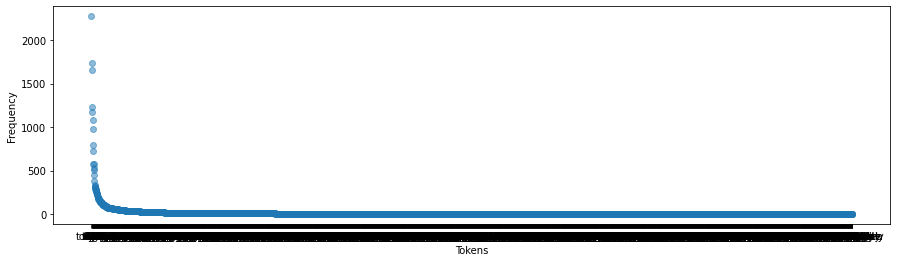

In [48]:
plt.figure(figsize=(15,4), )
plt.scatter(xs2,ys2, alpha = 0.5)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()

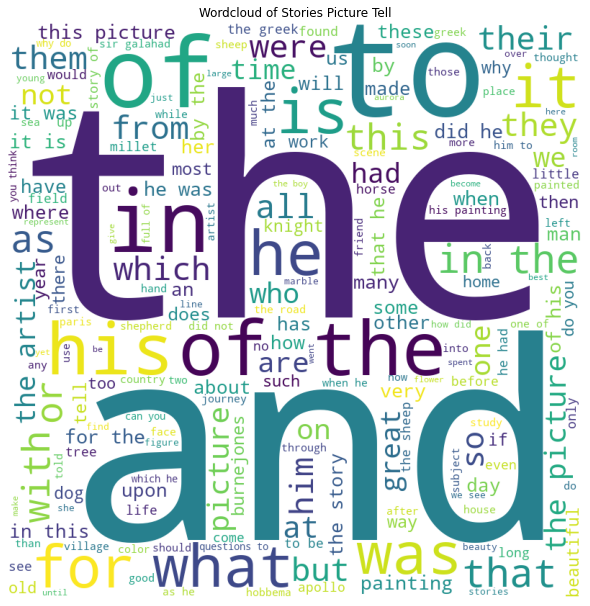

In [16]:
wordcloud1 = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10, stopwords = [] ,
                      random_state=1).generate(T1_updated) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.title("Wordcloud of Stories Picture Tell")

plt.show()

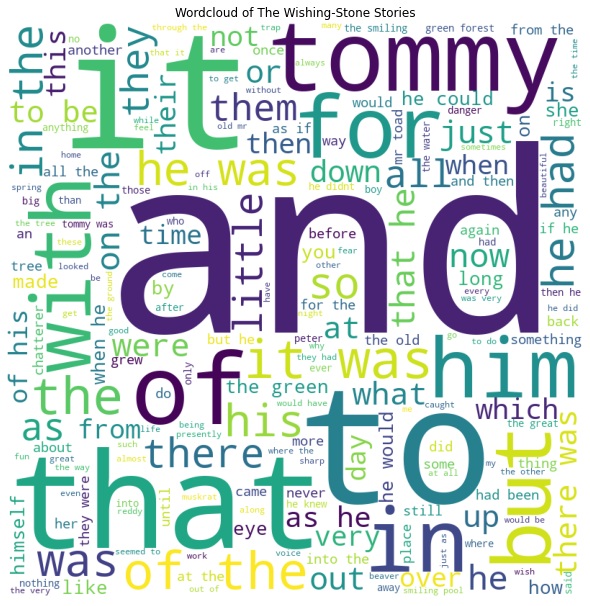

In [17]:
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10, stopwords = [],
                random_state=1).generate(T2_updated)
  
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Wordcloud of The Wishing-Stone Stories")
  
plt.show() 

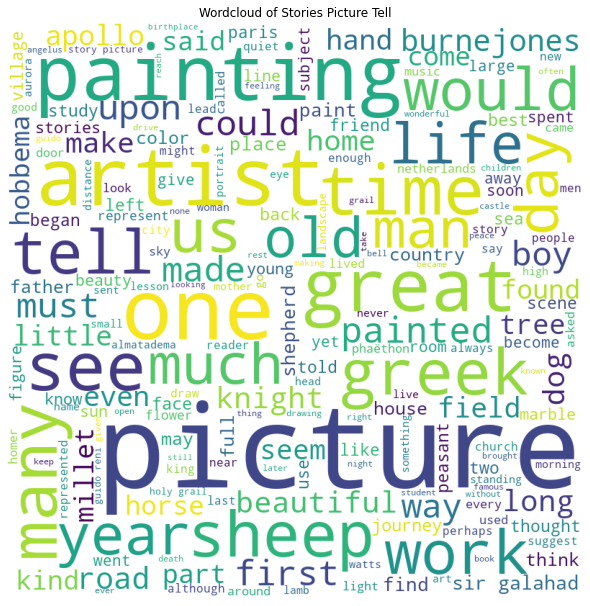

In [18]:
stoplist = set(stopwords.words("english"))
wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stoplist, 
                min_font_size = 10).generate(T1_updated) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud3) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Wordcloud of Stories Picture Tell")
  
plt.show() 

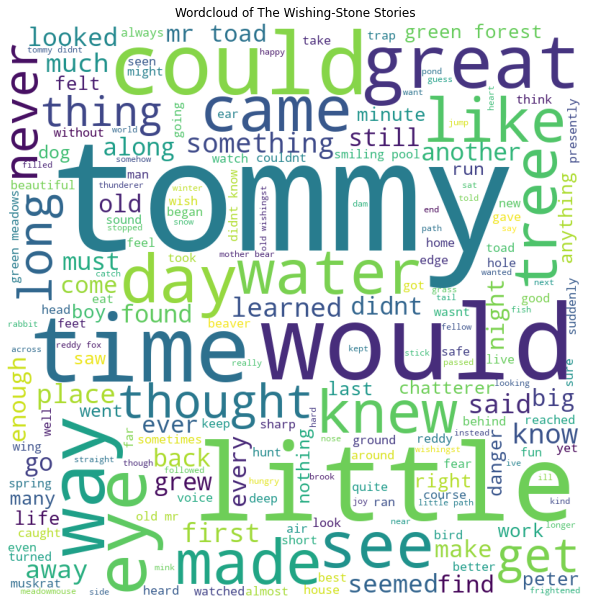

In [19]:
stoplist = set(stopwords.words("english"))
wordcloud4 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stoplist, 
                min_font_size = 10).generate(T2_updated) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud4) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Wordcloud of The Wishing-Stone Stories")
  
plt.show() 

In [20]:
def RemoveStopWords(text):
    tokens = word_tokenize(text)
    dict_stop_words = dict()
    stop_words = stopwords.words('english')
    
    without_stop=[]
    
    for i in tokens:
        if i not in stop_words:
            without_stop.append(i)
    
    return (without_stop)

In [21]:
Token_T1_without_stopwords = RemoveStopWords(T1_updated)
Token_T2_without_stopwords = RemoveStopWords(T2_updated)
print(Token_T1_without_stopwords)
print(Token_T2_without_stopwords)

['\ufeffquestions', 'arouse', 'interest', 'man', 'dressed', 'armor', 'title', 'sir', 'tell', 'us', 'many', 'read', 'tennysons', 'poems', 'telling', 'story', 'knights', 'round', 'table', 'sir', 'galahad', 'look', 'think', 'starting', 'journey', 'rather', 'returning', 'one', 'think', 'must', 'important', 'journey', 'go', 'expected', 'knight', 'days', 'tell', 'good', 'deeds', 'would', 'judge', 'character', 'knight', 'represented', 'picture', 'walking', 'standing', 'still', 'looking', 'something', 'particular', 'lost', 'thought', 'appear', 'angry', 'meek', 'determined', 'hesitating', 'thoughtful', 'dreamy', 'clasped', 'hands', 'indicate', 'color', 'horse', 'upon', 'part', 'man', 'horse', 'light', 'fall', 'would', 'consider', 'main', 'thought', 'expressed', 'picture', 'original', 'picture', 'collection', 'alexander', 'henderson', 'mp', 'london', 'england', 'artist', 'george', 'frederick', 'watts', 'wŏts', 'birthplace', 'london', 'england', 'dates', 'born', '1817', 'died', '1904', 'story', '

In [22]:
from collections import Counter

def word_length_frequency(tokens):
  dict1 = dict(Counter(tokens))
  x = []
  y = []
  for key,val in dict1.items():
    x.append(len(key))
    y.append(val)
  return x,y

In [23]:
len_T1, freq_T1 = word_length_frequency(Token_T1_without_stopwords)
len_T2, freq_T2 = word_length_frequency(Token_T2_without_stopwords)

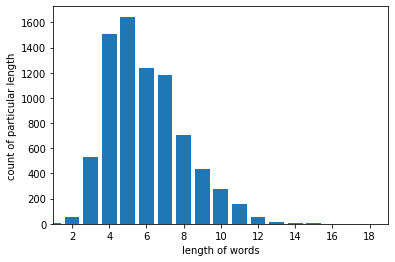

In [24]:
length1 = max(len_T1)+1
len_freq = [0] * length1
j = 0
for item in len_T1:
  len_freq[item] += freq_T1[j]
  j += 1

plt.bar(range(1,length1), len_freq[1:length1])
# plt.x_ran
plt.xlabel('length of words')
plt.xlim(1,length1)
plt.ylabel('count of particular length')
plt.show()
# len_freq

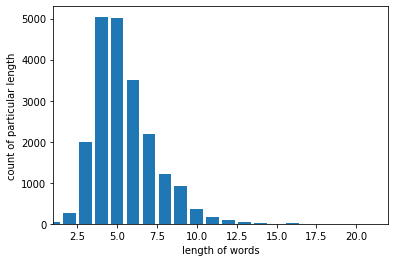

In [25]:
length2 = max(len_T2)+1
len_freq2 = [0] * length2
j = 0
for item in len_T2:
  len_freq2[item] += freq_T2[j]
  j += 1
plt.bar(range(1,length2), len_freq2[1:length2])
plt.xlim(1,length2)
plt.xlabel('length of words')
plt.ylabel('count of particular length')
plt.show()

PoS Tagging

In [32]:
from nltk.tag import pos_tag
from nltk.corpus import brown
tags_T1 = pos_tag(Token_T1_without_stopwords)
tags_T2 = pos_tag(Token_T2_without_stopwords)
print(tags_T1)
print(tags_T2)

[('\ufeffquestions', 'NNS'), ('arouse', 'VBP'), ('interest', 'NN'), ('man', 'NN'), ('dressed', 'VBN'), ('armor', 'JJ'), ('title', 'NN'), ('sir', 'NN'), ('tell', 'VBP'), ('us', 'PRP'), ('many', 'JJ'), ('read', 'JJ'), ('tennysons', 'NNS'), ('poems', 'VBP'), ('telling', 'VBG'), ('story', 'NN'), ('knights', 'NNS'), ('round', 'NN'), ('table', 'NN'), ('sir', 'NN'), ('galahad', 'VBD'), ('look', 'NN'), ('think', 'VBP'), ('starting', 'VBG'), ('journey', 'NN'), ('rather', 'RB'), ('returning', 'VBG'), ('one', 'CD'), ('think', 'NN'), ('must', 'MD'), ('important', 'JJ'), ('journey', 'NN'), ('go', 'VBP'), ('expected', 'VBN'), ('knight', 'JJ'), ('days', 'NNS'), ('tell', 'VBP'), ('good', 'JJ'), ('deeds', 'NNS'), ('would', 'MD'), ('judge', 'VB'), ('character', 'NN'), ('knight', 'NN'), ('represented', 'VBD'), ('picture', 'NN'), ('walking', 'VBG'), ('standing', 'VBG'), ('still', 'RB'), ('looking', 'VBG'), ('something', 'NN'), ('particular', 'JJ'), ('lost', 'VBD'), ('thought', 'JJ'), ('appear', 'RB'), ('a

{'NNS': 912, 'VBP': 366, 'NN': 2486, 'VBN': 275, 'JJ': 1467, 'PRP': 32, 'VBG': 330, 'VBD': 566, 'RB': 474, 'CD': 127, 'MD': 112, 'VB': 210, 'IN': 156, 'JJS': 43, 'VBZ': 148, 'RP': 10, 'CC': 5, 'JJR': 23, 'RBS': 2, 'WDT': 4, 'WP$': 6, 'NNP': 6, 'RBR': 19, 'WRB': 5, 'DT': 19, 'FW': 10}


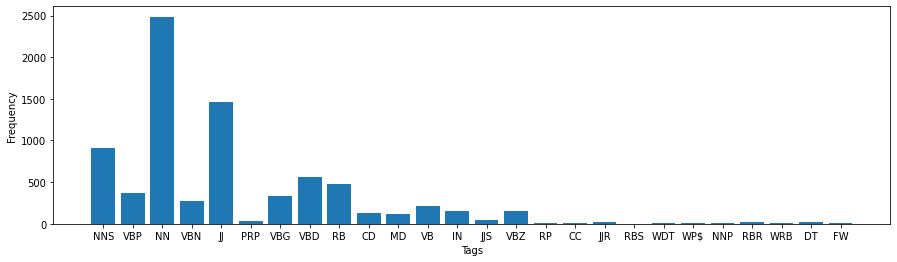

In [37]:
tags = []
for x, y in tags_T1:
    tags.append(y)

dict_T1 = dict(Counter(tags))
x_ = []
y_ = []
for key,val in dict_T1.items():
  x_.append(key)
  y_.append(val)
print(dict_T1)
plt.figure(figsize=(15,4))
plt.bar(x_, y_)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()

{'NN': 6220, 'VBD': 2061, 'JJ': 4422, 'NNS': 1657, 'VBP': 739, 'RB': 1852, 'VBG': 918, 'IN': 453, 'VBN': 692, 'VB': 734, 'VBZ': 171, 'WRB': 6, 'DT': 106, 'MD': 436, 'RP': 36, 'JJR': 113, 'JJS': 137, 'PRP': 19, 'RBR': 68, 'RBS': 3, 'CC': 9, 'WP$': 3, 'FW': 4, 'NNP': 1, 'WDT': 6, 'WP': 4, 'CD': 6, 'UH': 5, 'EX': 3}


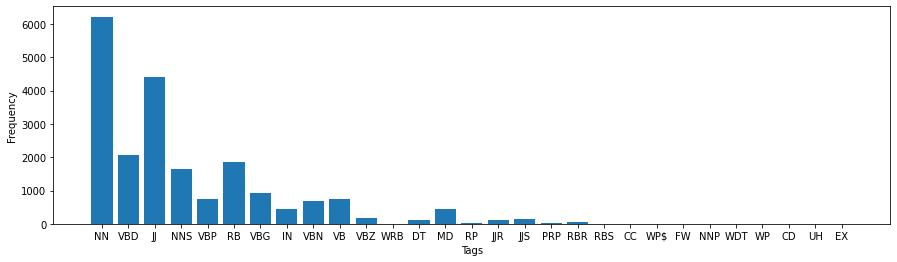

In [36]:
tags2 = []
for x, y in tags_T2:
    tags2.append(y)

dict_T2 = dict(Counter(tags2))
x_ = []
y_ = []
for key,val in dict_T2.items():
  x_.append(key)
  y_.append(val)
print(dict_T2)
plt.figure(figsize=(15,4))
plt.bar(x_, y_)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def WordCount(token):
    word_dict = {}
    for i in token:
        word_dict[i] = word_dict.get(i,0)+1
    return word_dict

In [ ]:
stories_word_count = WordCount(tokens_stories)
lords_word_count = WordCount(tokens_lords)